# Project 1: fys-stk4155

Import python packages

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from imageio import imread

## Generate random data and make a plot of using the Franke function

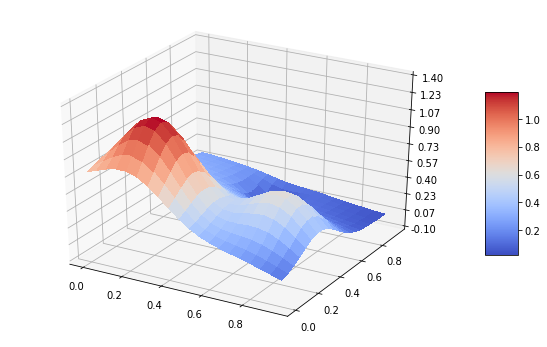

In [2]:
from functions import franke_function
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Select the models

## Select the models in terms of the parameters that minimize the MSE and the R2 scores

Import our functions written for this project

In [3]:
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from functions import generateDesignmatrix

# Generate a random sample to test our code with the Franke function

In [4]:
# we use this seed in order to raplicate the experiment with the same data
np.random.seed(1000)  

# Data
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)

# Experimental setup

## Define the models and the parameters that we want to compare.
The model are Ordinary Least Squares (OLS), Ridge and Lasso.
The parameter are []


In [5]:
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
 
The sample is splitted leaving 80% of the data for training the model and 20% for testing it.

The polynomial order varies from 1 to 5.

The polynomial order is: 1
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 2
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 3


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 4
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 5
Testing model: ridge
Testing model: ols
Testing model: lasso


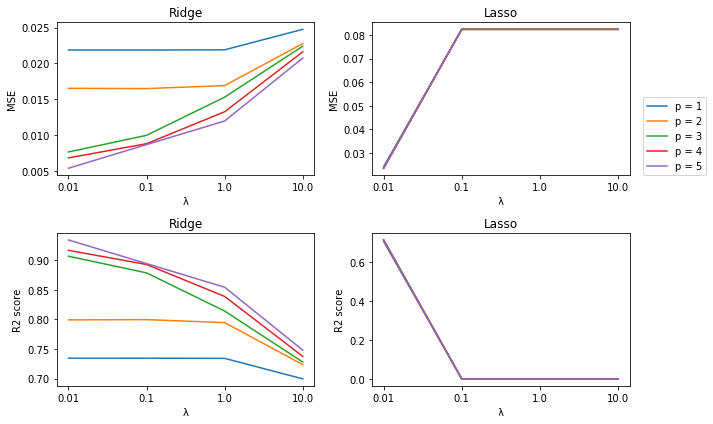

In [6]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders

    # Subplot for ridge
    plt.figure(1, figsize = (10,6))
    plt.subplot(221)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(222)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)


     # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.subplot(223)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(224)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')

    
plt.savefig("model_selection.png")
plt.tight_layout()    
plt.show()
    
    

In [7]:
results

{'mse': {'ridge': [[0.005421009382658206,
    0.008711462283081846,
    0.011996422486970025,
    0.020747860509404487]],
  'lasso': [[0.023586365702557295,
    0.08241004623695133,
    0.08241004623695133,
    0.08241004623695133]],
  'ols': [[0.0029249987756259986]]},
 'r2': {'ridge': [[0.9341765496176885,
    0.8942229269733086,
    0.8543359982252765,
    0.748073528308443]],
  'lasso': [[0.7136075843203864,
    -0.000646412241043004,
    -0.000646412241043004,
    -0.000646412241043004]],
  'ols': [[0.9644838261317802]]}}

# Run the code with SRTM data

## We selected images from Flekkefjord (Norway) and Montevideo (Uruguay)


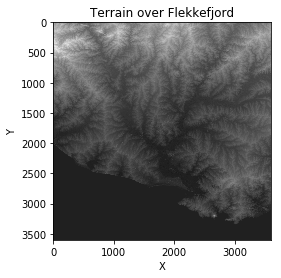

In [19]:
# Load the terrain
terrain_flekkefjord = imread('Montevideo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We subset the data, and generate a squared not singular design matrix.

In [29]:
terrain_flekkefjord = terrain_flekkefjord[0:100,0:100 ]
terrain_flekkefjord.shape


x = np.linspace(1, 100, num=100)
y = np.linspace(1+80, 100+80, num=100)

x = np.arange(100)
y = 2.5*x
# Generate a grid
x = np.squeeze(np.tile(x,[1,100] ))
y = np.squeeze(np.tile(y,[1,100] )) 
z = np.ndarray.flatten(terrain_flekkefjord)

p = 5
X = generateDesignmatrix(p,x,y)


In [30]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

Testing model: ridge
Testing model: ols
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [31]:
results_flekkefjord

{'mse': {'ridge': [[11760.677765395141,
    4283.275310462679,
    7140.121323921668,
    4992.1366123053185]],
  'lasso': [[55.71916372087537,
    55.718508956566815,
    55.71926770039597,
    56.44606244180449]],
  'ols': [[255.44427946158876]]},
 'r2': {'ridge': [[-188.09319623154545,
    -67.86832842051261,
    -113.80191784474071,
    -79.26570295318484]],
  'lasso': [[0.1041235063568553,
    0.10413403393684284,
    0.10412183452974766,
    0.09243611850225819]],
  'ols': [[-3.1071421414659453]]}}